<a href="https://colab.research.google.com/github/eyalgur1/Computer_Vision__Huggning_Face_Community_CV_Course/blob/main/computer_vision_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2 as cv2
from keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# LaTeX and Google Drive configuration

!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra dvipng texlive-fonts-recommended cm-super


plt.rcParams.update({
    "text.usetex": True,             # Use LaTeX for all text
    "font.family": "serif",          # Use serif fonts
    "font.serif": ["Computer Modern Roman"],  # Use Computer Modern Roman font
    "text.latex.preamble": r"\usepackage{amsmath}",  # Load additional packages
    "font.size": 16,                 # Default font size
    "axes.titlesize": 16,            # Title font size
    "axes.labelsize": 16,            # Axis labels font size
    "xtick.labelsize": 10,           # X-tick labels font size
    "ytick.labelsize": 10,           # Y-tick labels font size
    "legend.fontsize": 14            # Legend font size
})

#from google.colab import drive
#drive.mount("/content/drive/")

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,423 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,449 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,553 kB]
Hit:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:14 https://ppa.launchpadc

## **Image Point Processing Operations**

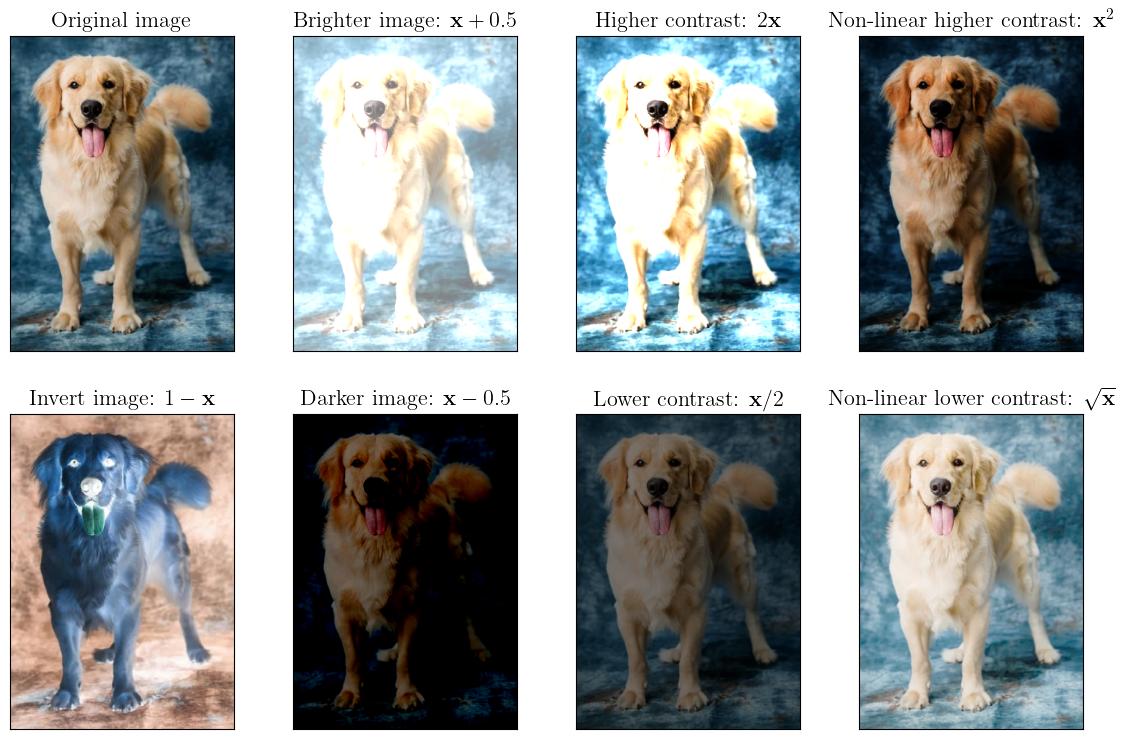

In [10]:
image_cv2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/CV_figs/dog.PNG', 1)
# flag=1 for color images, flag=0 for grayscale; loads in 8-bit format (integers from 0 to 255)

image = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)/255.0
# BGR is the default format of cv2, while RGB is the format matplotlib expects
# matplotlib expects range of [0,1] for floats and [0,...,255] for integers, so we divide by 255.0 to tranform to floats of [0,1] (more convinient handling)

f, ax = plt.subplots(2,4, figsize=(14,9))
ax[0,0].imshow(image); ax[0,0].set_title('Original image')  # display original image
ax[1,0].imshow(1-image); ax[1,0].set_title('Invert image: $1-\mathbf{x}$')  # display original image
# matplotlib automatically scales to the range [0,1] for floats

ax[0,1].imshow(image + 0.5); ax[0,1].set_title('Brighter image: $\mathbf{x}+0.5$')  # display brighter image
ax[1,1].imshow(image - 0.5); ax[1,1].set_title('Darker image: $\mathbf{x}-0.5$')
# matplotlib first clips values out of range [0,1] to the nearest edge value, and then scales to [0,1] for floats

ax[0,2].imshow(image*2); ax[0,2].set_title('Higher contrast: $2\mathbf{x}$')
ax[1,2].imshow(image/2); ax[1,2].set_title('Lower contrast: $\mathbf{x}/2$')

ax[0,3].imshow(image**2); ax[0,3].set_title('Non-linear higher contrast: $\mathbf{x}^{2}$')
ax[1,3].imshow(image**(1/2)); ax[1,3].set_title('Non-linear lower contrast: $\sqrt{\mathbf{x}}$')

# remove xticks and yticks
for i in range (2):
  for j in range (4):
    ax[i,j].set_xticks([]); ax[i,j].set_yticks([])
plt.show()

## **Box Filtering**

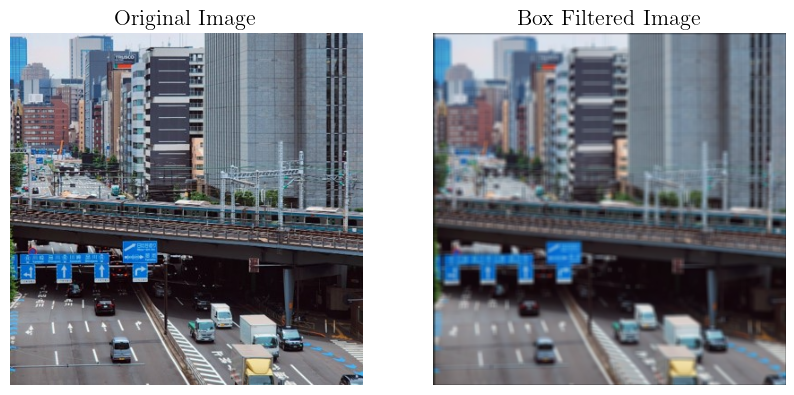

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_box_filter(image, kernel_size):
    # Get the dimensions of the image
    height, width, channels = image.shape

    # Create the box filter (kernel matrix) with uniform weights
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size**2)

    # Calculate the padding needed for the kernel
    pad_h = kernel_size // 2
    pad_w = kernel_size // 2

    # Pad the image with zeros on the border
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant', constant_values=0)

    # Initialize the output image
    filtered_image = np.zeros_like(image)

    # Perform the convolution operation
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                # Extract the region of interest (ROI) corresponding to the current position
                roi = padded_image[y:y + kernel_size, x:x + kernel_size, c]

                # Apply the box filter (element-wise multiplication and sum)
                filtered_pixel = np.sum(roi * kernel)  # since this colnvolution is symmetric, we can just take element-wise multiplication and sum

                # Assign the filtered value to the output image
                filtered_image[y, x, c] = filtered_pixel

    return filtered_image

# Load the RGB image using OpenCV
image_cv2 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer_Vision/CV_figs/road.jpg', 1)

# Convert the image from BGR (OpenCV default) to RGB
image = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)/255.0

# Define the size of the box filter (kernel size)
kernel_size = 5  # This is a 5x5 box filter

# Apply the custom box filter function
filtered_image = apply_box_filter(image, kernel_size)

# Display the original and filtered images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Box Filtered Image')
plt.axis('off')

plt.show()